# PCA - Tarefa 01: *HAR* com PCA

Vamos trabalhar com a base da demonstração feita em aula, mas vamos explorar um pouco melhor como é o desempenho da árvore variando o número de componentes principais.

In [1]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import time
import warnings
warnings.filterwarnings("ignore")

filename_features = "./Dados/UCI HAR Dataset/features.txt"
filename_labels = "./Dados/UCI HAR Dataset/activity_labels.txt"

filename_subtrain = "./Dados/UCI HAR Dataset/train/subject_train.txt"
filename_xtrain = "./Dados/UCI HAR Dataset/train/X_train.txt"
filename_ytrain = "./Dados/UCI HAR Dataset/train/y_train.txt"

filename_subtest = "./Dados/UCI HAR Dataset/test/subject_test.txt"
ffilename_xtest = "./Dados/UCI HAR Dataset/test/X_test.txt"
filename_ytest = "./Dados/UCI HAR Dataset/test/y_test.txt"
features = pd.read_csv(filename_features, header=None, names=['nome_var'], sep="#")['nome_var']
labels = pd.read_csv(filename_labels, delim_whitespace=True, header=None, names=['cod_label', 'label'])

subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'])['subject_id']
X_train = pd.read_csv(filename_xtrain, delim_whitespace=True, header=None, names=features.tolist())
y_train = pd.read_csv(filename_ytrain, header=None, names=['cod_label'])

subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id'])['subject_id']
X_test = pd.read_csv(ffilename_xtest, delim_whitespace=True, header=None, names=features.tolist())
y_test = pd.read_csv(filename_ytest, header=None, names=['cod_label'])

## Árvore de decisão

Rode uma árvore de decisão com todas as variáveis, utilizando o ```ccp_alpha=0.001```. Avalie a acurácia nas bases de treinamento e teste. Avalie o tempo de processamento.

In [2]:
%%time

clf = DecisionTreeClassifier(random_state=42, ccp_alpha=0.001)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_train = accuracy_score(y_train, clf.predict(X_train))
accuracy_test = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo Decision Tree (treinamento): {accuracy_train:.4f}")
print(f"Acurácia do modelo Decision Tree (teste): {accuracy_test:.4f}")

Acurácia do modelo Decision Tree (treinamento): 0.9758
Acurácia do modelo Decision Tree (teste): 0.8799
CPU times: total: 4.25 s
Wall time: 4.27 s


## Árvore com PCA

Faça uma análise de componemtes principais das variáveis originais. Utilize apenas uma componente. Faça uma árvore de decisão com esta componente como variável explicativa.

- Avalie a acurácia nas bases de treinamento e teste
- Avalie o tempo de processamento

In [3]:
%%time
n = 1 # Número de componentes principais
prcomp = PCA(n).fit(X_train)

pc_treino = prcomp.transform(X_train)
pc_teste  = prcomp.transform(X_test)
pc_treino.shape

clf_pc = DecisionTreeClassifier(random_state=42, ccp_alpha=0.001)
clf_pc.fit(pc_treino, y_train)
y_pred_pc = clf_pc.predict(pc_teste)
accuracy_train_pc = accuracy_score(y_train, clf_pc.predict(pc_treino))
accuracy_test_pc = accuracy_score(y_test, y_pred_pc)
print(f"Acurácia do modelo Decision Tree com PCA (treinamento): {accuracy_train_pc:.4f}")
print(f"Acurácia do modelo Decision Tree com PCA (teste): {accuracy_test_pc:.4f}")

Acurácia do modelo Decision Tree com PCA (treinamento): 0.4997
Acurácia do modelo Decision Tree com PCA (teste): 0.4571
CPU times: total: 109 ms
Wall time: 119 ms


## Testando o número de componentes

Com base no código acima, teste a árvore de classificação com pelo menos as seguintes possibilidades de quantidades de componentes: ```[1, 2, 5, 10, 50]```. Avalie para cada uma delas:

- Acurácia nas bases de treino e teste
- Tempo de processamento


In [4]:
def modelo_pca(n_components):
    prcomp = PCA(n_components).fit(X_train)
    pc_treino = prcomp.transform(X_train)
    pc_teste  = prcomp.transform(X_test)
    
    clf_pc = DecisionTreeClassifier(random_state=42, ccp_alpha=0.001)
    clf_pc.fit(pc_treino, y_train)
    y_pred_pc = clf_pc.predict(pc_teste)
    accuracy_train_pc = accuracy_score(y_train, clf_pc.predict(pc_treino))
    accuracy_test_pc = accuracy_score(y_test, y_pred_pc)
    return accuracy_train_pc, accuracy_test_pc

In [5]:
start_time = time.time()
valid = []
for n in [2, 5, 10, 50, 100]:
    accuracy_train_pc, accuracy_test_pc = modelo_pca(n)
    print(f"Número de componentes principais: {n}")
    print(f"Acurácia do modelo Decision Tree com PCA (treinamento): {accuracy_train_pc:.4f}")
    print(f"Acurácia do modelo Decision Tree com PCA (teste): {accuracy_test_pc:.4f}")
    valid.append((n, accuracy_train_pc, accuracy_test_pc, time.time() - start_time))
    print(f"Tempo de execução: {time.time() - start_time:.4f} segundos")
    print("--------------------------------------------------")


Número de componentes principais: 2
Acurácia do modelo Decision Tree com PCA (treinamento): 0.6128
Acurácia do modelo Decision Tree com PCA (teste): 0.5847
Tempo de execução: 0.1237 segundos
--------------------------------------------------
Número de componentes principais: 5
Acurácia do modelo Decision Tree com PCA (treinamento): 0.8460
Acurácia do modelo Decision Tree com PCA (teste): 0.7886
Tempo de execução: 0.2861 segundos
--------------------------------------------------
Número de componentes principais: 10
Acurácia do modelo Decision Tree com PCA (treinamento): 0.8927
Acurácia do modelo Decision Tree com PCA (teste): 0.8242
Tempo de execução: 0.4612 segundos
--------------------------------------------------
Número de componentes principais: 50
Acurácia do modelo Decision Tree com PCA (treinamento): 0.9193
Acurácia do modelo Decision Tree com PCA (teste): 0.8229
Tempo de execução: 1.0235 segundos
--------------------------------------------------
Número de componentes principa

In [6]:
valid_df = pd.DataFrame(valid, columns=["n_components", "accuracy_train", "accuracy_test", "execution_time"])
valid_df

,n_components,accuracy_train,accuracy_test,execution_time
0,2,0.612758,0.584662,0.123651
1,5,0.846028,0.788599,0.286065
2,10,0.892682,0.824228,0.461246
3,50,0.919342,0.822871,1.023548
4,100,0.923150,0.828979,2.047383


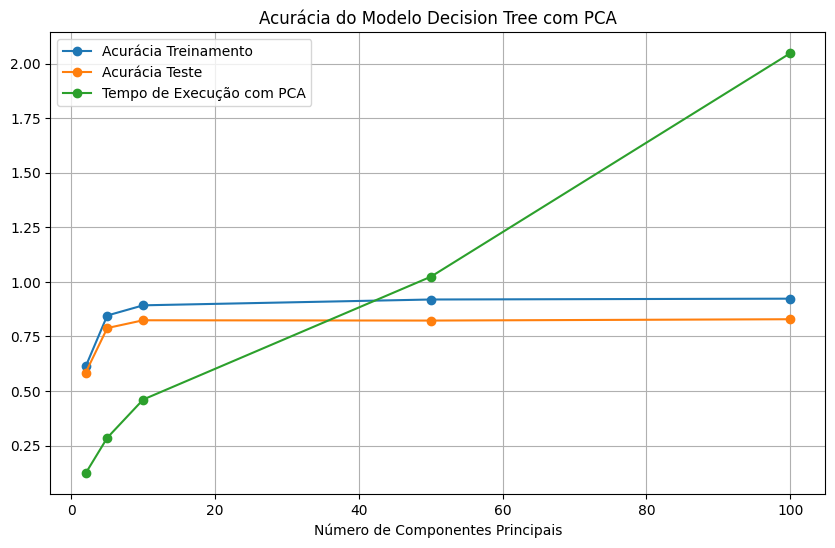

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(valid_df['n_components'], valid_df['accuracy_train'], marker='o', label='Acurácia Treinamento')
plt.plot(valid_df['n_components'], valid_df['accuracy_test'], marker='o', label='Acurácia Teste')
# plt.plot([1, 100], [accuracy_train, accuracy_train], 'r--', label='Acurácia Treinamento sem PCA')
# plt.plot([1, 100], [accuracy_test, accuracy_test], 'g--', label='Acurácia Teste sem PCA')
plt.plot(valid_df['n_components'], valid_df['execution_time'], marker='o', label='Tempo de Execução com PCA')
plt.title('Acurácia do Modelo Decision Tree com PCA')
plt.xlabel('Número de Componentes Principais')
plt.legend()
plt.grid()
plt.show()

## Conclua

- O que aconteceu com a acurácia?
- O que aconteceu com o tempo de processamento?

- A acurácia diminuiu com a redução do número de componentes principais, especialmente quando o número de componentes é muito baixo (como 1 ou 2). Isso ocorre porque menos informações são retidas, o que pode levar a uma perda significativa de detalhes importantes para a classificação.
- O tempo de processamento diminuiu significativamente com a redução do número de componentes principais. Com menos variáveis para processar, o modelo é treinado e avaliado mais rapidamente, o que é especialmente benéfico para conjuntos de dados grandes.